# Leetcode - similar problem and topic tag prediction

## 2. Predicting if two problems are similar or not

In [78]:
import pandas as pd
import numpy as np
import nltk
data = pd.read_csv('similar_question_data_with_topics.csv')

In [79]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,q1id,q2id,question1,question2,q1_topics,q2_topics,target
0,88,1019,You are given two integer arrays nums1 and num...,Given an integer array nums sorted in non-decr...,"Array,Two Pointers,Sorting","Array,Two Pointers,Sorting",1
1,724,2102,"Given an array of integers nums, calculate the...","Given a 0-indexed integer array nums, find the...","Array,Prefix Sum","Array,Prefix Sum",1
2,967,1022,"Given an n x n array of integers matrix, retur...",You are given an m x n integer array grid wher...,"Array,Dynamic Programming,Matrix","Array,Backtracking,Bit Manipulation,Matrix",0
3,300,673,"Given an integer array nums, return the length...","Given an integer array nums, return the number...","Array,Binary Search,Dynamic Programming","Array,Dynamic Programming,Binary Indexed Tree,...",1
4,2280,334,You are given two 0-indexed arrays nums1 and n...,"Given an integer array nums, return true if th...","Array,Binary Search,Divide and Conquer,Binary ...","Array,Greedy",1
...,...,...,...,...,...,...,...
3147,462,453,"Given an integer array nums of size n, return ...","Given an integer array nums of size n, return ...","Array,Math,Sorting","Array,Math",1
3148,2076,258,You are given a string s consisting of lowerca...,"Given an integer num, repeatedly add all its d...","String,Simulation","Math,Simulation,Number Theory",1
3149,1008,162,You are given the root of a binary tree. We in...,A peak element is an element that is strictly ...,"Dynamic Programming,Tree,Depth-First Search,Bi...","Array,Binary Search",0
3150,2216,143,You are given the head of a linked list. Delet...,You are given the head of a singly linked-list...,"Linked List,Two Pointers","Linked List,Two Pointers,Stack,Recursion",1


In [80]:
df = data.copy()

## Preprocessing

In [81]:
# Removing punctuations 

import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

stopwords = stopwords.words('english')
punctuation = list(punctuation)


## Removing hyperlinks and other irrelevant tokens
def remove_unimp_tokens(data):
    retvar = []
    for text in data:
        text = text.split(" ");
        text = [i for i in text if not (i.startswith("https"))]
        text = [i for i in text if not ('\\' in i)]
        text = " ".join(text)
        retvar.append(text)
    return retvar


def basic_preprocessor(data):
    regexp_space = [r'\.', r'\[.\]']
    sentences_retvar = []
    for text in data:
        for pattern in regexp_space:
            p = re.compile(pattern)
            text = p.sub(" ", text)
        p = re.compile(r'= ')
        text = p.sub("=", text)
        p = re.compile(r'[^a-zA-Z ]+')
        text = re.sub(p, '', text)
        p = re.compile(r'&lt')
        text = p.sub(" less than ", text)
        p = re.compile(r'&gt')
        text = p.sub(" greater than ", text)
        sentences_retvar.append(text)
    return sentences_retvar


def remove_stopwords_punctuations(data, stopwords, punctuation):
    processed_sentences = []
    for sentence in data:
        words_tokenized = word_tokenize(sentence)
        cleaned_tokens = [token for token in words_tokenized if token not in stopwords and token not in punctuation]
        sentence = " ".join(cleaned_tokens)
        processed_sentences.append(sentence)
        
    return processed_sentences


def post_processing(data):
    retvar = []
    for line in data:
        line = re.sub('arr\s+', 'arr', line)
        retvar.append(line)
    return retvar

def remove_single_characters(data):
    retvar = []
    for text in data:
        text = text.split(" ");
        text = [i for i in text if not len(i) == 1]
        text = " ".join(text)
        retvar.append(text)
    return retvar

def lowercase(data):
    retvar = []
    for text in data:
        text = text.lower()
        retvar.append(text)
    return retvar

temp = basic_preprocessor(temp)
temp = remove_stopwords_punctuations(temp, stopwords, punctuation)
temp = post_processing(temp)
temp = remove_single_characters(temp)
temp = lowercase(temp)

temp[0]

'given integer array nums sorted nondecreasing order return array squares number sorted nondecreasing order'

In [82]:
# Converting data for question1 column
temp = basic_preprocessor(df['question1'])
temp = remove_stopwords_punctuations(temp, stopwords, punctuation)
temp = post_processing(temp)
temp = remove_single_characters(temp)
temp = lowercase(temp)
df['question1'] = temp

# Converting data for question2 column
temp = basic_preprocessor(df['question2'])
temp = remove_stopwords_punctuations(temp, stopwords, punctuation)
temp = post_processing(temp)
temp = remove_single_characters(temp)
temp = lowercase(temp)
df['question2'] = temp

In [83]:
df

,q1id,q2id,question1,question2,q1_topics,q2_topics,target
0,88,1019,you given two integer arrays nums nums sorted ...,given integer array nums sorted nondecreasing ...,"Array,Two Pointers,Sorting","Array,Two Pointers,Sorting",1
1,724,2102,given array integers nums calculate pivot inde...,given indexed integer array nums find leftmost...,"Array,Prefix Sum","Array,Prefix Sum",1
2,967,1022,given array integers matrix return minimum sum...,you given integer array grid grid could repres...,"Array,Dynamic Programming,Matrix","Array,Backtracking,Bit Manipulation,Matrix",0
3,300,673,given integer array nums return length longest...,given integer array nums return number longest...,"Array,Binary Search,Dynamic Programming","Array,Dynamic Programming,Binary Indexed Tree,...",1
4,2280,334,you given two indexed arrays nums nums length ...,given integer array nums return true exists tr...,"Array,Binary Search,Divide and Conquer,Binary ...","Array,Greedy",1
...,...,...,...,...,...,...,...
3147,462,453,given integer array nums size return minimum n...,given integer array nums size return minimum n...,"Array,Math,Sorting","Array,Math",1
3148,2076,258,you given string consisting lowercase english ...,given integer num repeatedly add digits result...,"String,Simulation","Math,Simulation,Number Theory",1
3149,1008,162,you given root binary tree we install cameras ...,peak element element strictly greater neighbor...,"Dynamic Programming,Tree,Depth-First Search,Bi...","Array,Binary Search",0
3150,2216,143,you given head linked list delete middle node ...,you given head singly linkedlist the list repr...,"Linked List,Two Pointers","Linked List,Two Pointers,Stack,Recursion",1


## Feature Engineering

In [8]:
# Feature Engineering : 

# Here i have pointed out a bunch of possible features i can think of, There can be many more like this 
# But as of now i am using only these because of time constraints

# Topic Features
# 1. topic_intersection_ratio - topic intersection ratio
# 2. topic_symmetric_difference - symmetric difference between topics of question 1 and question 2
# 3. n_topics_q1 = number of topics in question 1
# 4. n_topics_q2 = number of topics in question 2

# Question feature
# 1. q1_length - Length of question 1
# 2. q2_length - Length of question 2
# 3. n_words_q1 - Number of words in q1
# 4. n_words_q2 - Number of words in q2
# 5. n_common_words - Number of common unique words
# 6. common_word_ratio - word Share ratio
# 7. avg_token_length - average token lengths of both questions - q1Tokens and q2Tokens
# 8. Fuzz ratio
# 9. Fuzz partial ratio
# 10. token sort ratio
# 11. token set ratio
# 12. longest substring ratio

In [84]:
# Feature engineering on Topics 

# First convert topics to sets:
df['q1_topics'] = list(map(lambda x: set(x.split(',')), df['q1_topics']))
df['q2_topics'] = list(map(lambda x: set(x.split(',')), df['q2_topics']))

# 1. topic_intersection_ratio - topic intersection ratio
df['topic_intersection_ratio'] = list(map(lambda x, y: len(x.intersection(y))/len(x.union(y)), df['q1_topics'], df['q2_topics']))

# 2. topic_symmetric_difference - symmetric difference between topics of question 1 and question 2
df['topic_symmetric_diff'] = list(map(lambda x, y: len(x.symmetric_difference(y)), df['q1_topics'], df['q2_topics']))

# 3. n_topics_q1 = number of topics in question 1
df['n_topics_q1'] = list(map(lambda x: len(x), df['q1_topics']))

# 4. n_topics_q2 = number of topics in question 2
df['n_topics_q2'] = list(map(lambda x: len(x), df['q2_topics']))

In [95]:
# Feature engineering on questions

from fuzzywuzzy import fuzz

# 1. q1_length - Length of question 1
df['q1_length'] = list(map(lambda x: len(x), df['question1']))

# 2. q2_length - Length of question 2
df['q2_length'] = list(map(lambda x: len(x), df['question2']))

# 3. n_words_q1 - Number of words in q1
df['n_words_q1'] = list(map(lambda x: len(x.split()), df['question1']))

# 4. n_words_q2 - Number of words in q2
df['n_words_q2'] = list(map(lambda x: len(x.split()), df['question2']))

# 5. n_common_words - Number of common unique words
df['n_common_words']=list(map(lambda x,y:len(set(x.split()).intersection(set(y.split()))), 
                           df['question1'], 
                           df['question2']))

# 6. common_word_ratio - word Share ratio
df['common_word_ratio']=list(map(
    lambda x,y:len(set(x.split()).intersection(set(y.split())))/len(set(x.split()).union(set(y.split()))), 
    df['question1'], 
    df['question2']))

# 7. avg_token_length - average token lengths of both questions - q1Tokens and q2Tokens

# 8. Fuzz ratio
df['fuzz_ratio'] = list(map(lambda x, y: fuzz.ratio(x,y), df['question1'], df['question2']))

# 9. Fuzz partial ratio
df['fuzz_partial_ratio'] = list(map(lambda x, y: fuzz.partial_ratio(x,y), df['question1'], df['question2']))

# 10. token sort ratio
df['token_sort_ratio'] = list(map(lambda x, y: fuzz.token_sort_ratio(x,y), df['question1'], df['question2']))

# 11. token set ratio
df['token_set_ratio'] = list(map(lambda x, y: fuzz.token_set_ratio(x,y), df['question1'], df['question2']))

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   q1id                      3152 non-null   int64  
 1   q2id                      3152 non-null   int64  
 2   question1                 3152 non-null   object 
 3   question2                 3152 non-null   object 
 4   q1_topics                 3152 non-null   object 
 5   q2_topics                 3152 non-null   object 
 6   target                    3152 non-null   int64  
 7   topic_intersection_ratio  3152 non-null   float64
 8   topic_symmetric_diff      3152 non-null   int64  
 9   n_topics_q1               3152 non-null   int64  
 10  n_topics_q2               3152 non-null   int64  
 11  q1_length                 3152 non-null   int64  
 12  q2_length                 3152 non-null   int64  
 13  n_words_q1                3152 non-null   int64  
 14  n_words_

## Making data ready for the model


In [142]:
# TFIDF on questions
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer, StandardScaler

train_test_labels = df['target']
train_test_data = df.drop(['q1id','q2id','q1_topics','q2_topics', 'target'], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(train_test_data, train_test_labels, test_size=0.2, stratify=train_test_labels)

transformed_train_data = []
transformed_test_data = []

preprocessors = {}

vectorizing_features = ['question1', 'question2']
normalizing_features = [
    'topic_intersection_ratio',
    'topic_symmetric_diff',
    'n_topics_q1',
    'n_topics_q2',
    'q1_length',
    'q2_length',
    'n_words_q1',
    'n_words_q2',
    'n_common_words',
    'common_word_ratio',
    'fuzz_ratio',
    'fuzz_partial_ratio',
    'token_sort_ratio',
    'token_set_ratio'
]

for feature in tqdm(vectorizing_features):
    preprocessors[feature] = TfidfVectorizer(min_df = 5)
    transformed_train_data.append(preprocessors[feature].fit_transform(xtrain[feature]))
    transformed_test_data.append(preprocessors[feature].transform(xtest[feature]))
    
for feature in tqdm(normalizing_features):
    preprocessors[feature] = StandardScaler()
    transformed_train_data.append(preprocessors[feature].fit_transform(np.array(xtrain[feature]).reshape(-1,1)))
    transformed_test_data.append(preprocessors[feature].transform(np.array(xtest[feature]).reshape(-1,1)))

100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1398.30it/s]


In [143]:
from scipy.sparse import hstack
from scipy import sparse

x_train = hstack(transformed_train_data).tocsr()
x_test = hstack(transformed_test_data).tocsr()

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (2521, 3477)
Testing data shape: (631, 3477)


# Defining model metric
Based on the problem, some of the things that i can point out as of now is <br/> 
If actually considering it as a functionality for leetcode, We need to be very sure while predicting similar question, Because at the end we need to make predictions for a new question, also, i might need to know, why the model predicted what it predicted, This can be checked using probability and feature importance, Another thing is, This process of making predictions is not done very often, because we do not expect a lot of question being added every minute, hour or in shorter time span, Thus there wont be any latency constraints here, This allows us to use complex models as well which might take some time to make predictions.
<br/><br/>
Summary:
1. As a metric i am selecting log-loss because i would need to know the probability of this similarity
2. Another metric for this would be precision and recall, We need to be very sure with the positive data points, Thus confusion matrix, precision, recall, f1 scores will be very helpful to check model performance.
3. No latency constraints, (model need not to be very fast, but not very slow as well)
4. Because i need the probability as well, i wont be using stacking or ensembling as it is hard to interpret probabilistic output from these complex methods.

## Training Model

### Training random mode to check what is the worst probability score we can get
Because i want to know what is the maximum possible log loss which we should not cross, As the range of log loss is 0->infinity, I want to know the upper bound, And based on that we can check how each algorithm improves the log loss scores.

### Training logistic regression (with/without hyperparameter tuning)

In [144]:
## Training baseling model - Naive Bayes - without hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression()
clf.fit(x_train, ytrain)
print("Log Loss on Training Data : {}".format(log_loss(ytrain, clf.predict_proba(x_train))))
print("Log loss on Testing Data : {}".format(log_loss(ytest, clf.predict_proba(x_test))))

Log Loss on Training Data : 0.2540201111463929
Log loss on Testing Data : 0.31918524335779674


## Observations - Logistic Regression
The log loss of training and testing data seems to be pretty good, as there isnt very huge difference between the train, test losses. <br/>
But let us try to do some hyperparameter tuning with regularization function, and check if performance increases

In [155]:
params = {'C':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

from sklearn.metrics import make_scorer, roc_auc_score
scorer = make_scorer(roc_auc_score)

import warnings
warnings.filterwarnings('ignore')

gscv = GridSearchCV(LogisticRegression(), params, cv = 10, return_train_score=True, scoring = scorer, verbose=1)
gscv.fit(x_train, ytrain)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1,
                               0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring=make_scorer(roc_auc_score),
             verbose=1)

In [156]:
print("GSCV RESULTS:")
print("Best Parameter: {}".format(gscv.best_params_))
print("Best Score (AUC): {}".format(gscv.best_score_))

GSCV RESULTS:
Best Parameter: {'C': 0.1}
Best Score (AUC): 0.8431503806237849


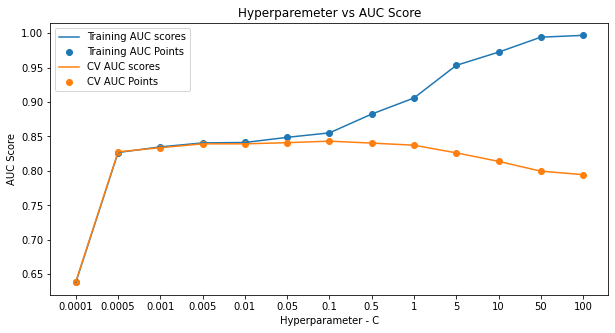

In [157]:
## Plotting the hyperparameter vs auc score curve to check which parameter gave the best scores for the model

import matplotlib.pyplot as plt

mean_train_scores = gscv.cv_results_['mean_train_score']
mean_cv_scores = gscv.cv_results_['mean_test_score']

fig = plt.figure(figsize=(10,5))
params_id = np.arange(0, len(params['C']), 1) # Using IDs for x axis
plt.plot(params_id, mean_train_scores, label='Training AUC scores')
plt.scatter(params_id, mean_train_scores, label='Training AUC Points')
plt.plot(params_id, mean_cv_scores, label='CV AUC scores')
plt.scatter(params_id, mean_cv_scores, label='CV AUC Points')
plt.xticks(params_id, params['C']) # setting xticks labels as the alpha value
plt.xlabel('Hyperparameter - C')
plt.ylabel('AUC Score')
plt.title('Hyperparemeter vs AUC Score')
plt.legend()
plt.show()

### Interpreting the plot
<b>As per the above plot, we can see that we started to get good auc scores for both training and CV data till the value of C was 0.01 and after that the models seems to start overfitting, as the auc score for training data increases but CV scores start to decrease, There fore i am considering the value of 'C' to be 0.01 here</b><br/>

<B>But after testing a bit more with the hyperparameter, i found that C=0.7 gives much more consistent results thus i will be using c = 0.7</B>

In [185]:
## 
clf1 = LogisticRegression(C=0.07)
clf1.fit(x_train, ytrain)
print("Log Loss on Training Data : {}".format(log_loss(ytrain, clf1.predict_proba(x_train))))
print("Log loss on Testing Data : {}".format(log_loss(ytest, clf1.predict_proba(x_test))))

Log Loss on Training Data : 0.3390616388749139
Log loss on Testing Data : 0.3136178520022708


Here we see that the training and testing loss has been increased but there is a smaller difference between the two values, This signifies that the model is much more consistent and generalized, If we see the previous values, Those seems to have a higher difference and models seems slightly overfitted, Thus for avoiding overfitting i am using C as 0.07

#### we can see that linear models are indeed performing pretty good, so we could have also checked with SVM, but in SVM we dont have any way to predict the probability thus log loss wont be a good metric for this, and as for this task i have selected log loss to be the performance metric, i wont be using SVMs.<br/> But lets go ahead and check the other metrics we defined, and see the results for our Logistic regression model


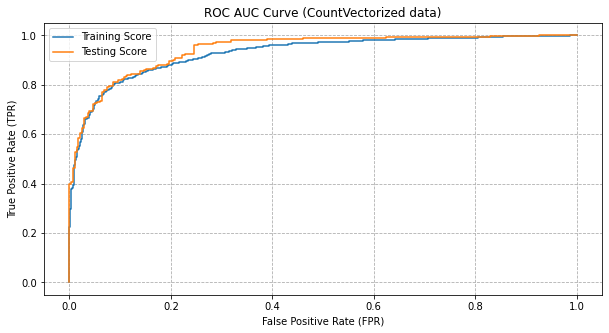

In [220]:
from sklearn.metrics import roc_curve

clf1_preds_probs_train = clf1.predict_proba(x_train)
clf1_preds_probs_test = clf1.predict_proba(x_test)

fpr_train, tpr_train, thresholds_train = roc_curve(ytrain, clf1_preds_probs_train.T[1], pos_label=1)
fpr_test, tpr_test, thresholds_test = roc_curve(ytest, clf1_preds_probs_test.T[1], pos_label=1)

# Plotting roc auc curve
fig = plt.figure(figsize=(10,5))
plt.plot(fpr_train, tpr_train, label = 'Training Score') # Training data
plt.plot(fpr_test, tpr_test, label = 'Testing Score') # testing data
plt.title('ROC AUC Curve (CountVectorized data)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(color='#adadad', linestyle= '--')
plt.legend()
plt.show()

#### from the curve, it is very clear that the model is indeed performing pretty good on the testing data, But here we want to maximize the True positive rate and minimize the False Positive rate thus, Let us select a metric that help us do so.<br/>But before that let us go ahead and plot the confusion matrix for train and test data and check the results, Then we can go ahead and find the optimal threshold

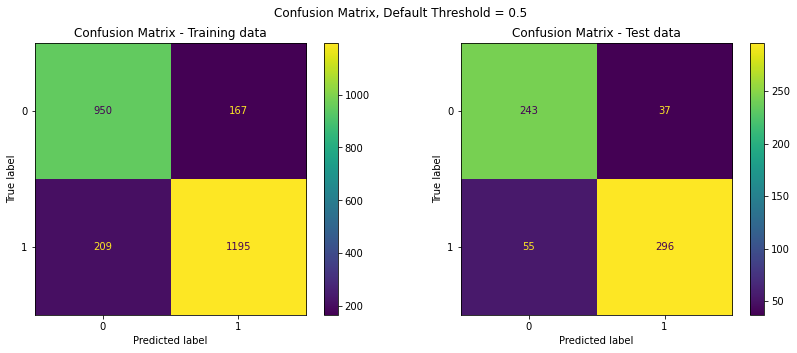

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns

cls_preds_clf1_train = clf1.predict(x_train)
cls_preds_clf1_test = clf1.predict(x_test)

# Plotting confusion matrix using ConfusionMatrixDisplay from sklearn

cm_train = ConfusionMatrixDisplay(confusion_matrix(ytrain, cls_preds_clf1_train))
cm_test = ConfusionMatrixDisplay(confusion_matrix(ytest, cls_preds_clf1_test))

fig = plt.figure(figsize=(14,5)) # Creating figure to hold subplots
fig.suptitle("Confusion Matrix, Default Threshold = 0.5")
ax_train = fig.add_subplot(1,2,1) # Defining second subplot and obtaining axis 
cm_train.plot(ax=ax_train) # Plotting the Confusion matrix for training data on axis 1
plt.title('Confusion Matrix - Training data')

ax_test = fig.add_subplot(1,2,2) # Defining second subplot and obtaining axis 
cm_test.plot(ax=ax_test) # Plotting the confusion matrix for testing data on axis 2
plt.title('Confusion Matrix - Test data')

plt.show()

#### The confusion matrix does seem ok for the model, We do have low false positive and false Negative rate which is pretty good

#### Finding the optimal threshold - TPR(1-FPR)

In [198]:
metric = tpr_train*(1-fpr_train)
best_threshold_index = np.where(metric == max(metric)) # Index of best Threshold
best_threshold = thresholds_train[best_threshold_index[0][0]]
print("Best threshold obtained as per defined metric : {}".format(best_threshold))

Best threshold obtained as per defined metric : 0.5968486160414446


#### Now lets check if it improves our confusion matrix

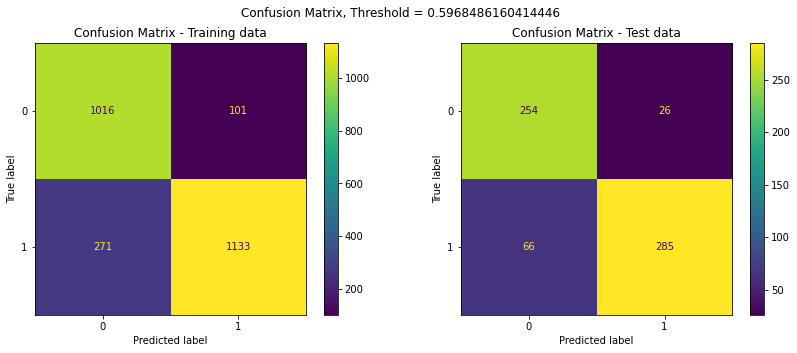

In [207]:
# Making predictions based on obtained threshold

cls_probs_train_bst_thres = clf1.predict_proba(x_train)
cls_probs_test_bst_thres = clf1.predict_proba(x_test)

cls_preds_bst_thres_train = [1 if i >= best_threshold else 0 for i in cls_probs_train_bst_thres.T[1]]
cls_preds_bst_thres_test = [1 if i >= best_threshold else 0 for i in cls_probs_test_bst_thres.T[1]]

# Plotting the confusion matrix again
cm_train = ConfusionMatrixDisplay(confusion_matrix(ytrain, cls_preds_bst_thres_train))
cm_test = ConfusionMatrixDisplay(confusion_matrix(ytest, cls_preds_bst_thres_test))

fig = plt.figure(figsize=(14,5)) # Creating figure to hold subplots
fig.suptitle("Confusion Matrix, Threshold = {}".format(best_threshold))

ax_train = fig.add_subplot(1,2,1) # Defining second subplot and obtaining axis 
cm_train.plot(ax=ax_train) # Plotting the Confusion matrix for training data on axis 1
plt.title('Confusion Matrix - Training data')

ax_test = fig.add_subplot(1,2,2) # Defining second subplot and obtaining axis 
cm_test.plot(ax=ax_test) # Plotting the confusion matrix for testing data on axis 2
plt.title('Confusion Matrix - Test data')

plt.show()

#### As seen in the ROC AUC curve, for an increase in TPR we will get an increase in FPR as well, But still model performs well for this threshold, so we will keep it for now. <br/><br/>Lets check other scores as well and decide which threshold to choose

# Summary table

In [219]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Metric', 'Threshold', 'Training Score', 'Testing Score']

# Log Loss
x.add_row(['Log-Loss', '0,5', log_loss(ytrain, clf1_preds_probs_train.T[1]), log_loss(ytest, clf1_preds_probs_test.T[1])])
x.add_row(['Log-Loss', '{:.3f}'.format(best_threshold), log_loss(ytrain, cls_probs_train_bst_thres.T[1]), log_loss(ytest, cls_probs_test_bst_thres.T[1])])

# Precision 
x.add_row(['Precision', '0.5', precision_score(ytrain, cls_preds_clf1_train), precision_score(ytest, cls_preds_clf1_test)])
x.add_row(['Precision', '{:.3f}'.format(best_threshold), precision_score(ytrain, cls_preds_bst_thres_train), precision_score(ytest, cls_preds_bst_thres_test)])

# Recall
x.add_row(['Recall', '0.5', recall_score(ytrain, cls_preds_clf1_train), recall_score(ytest, cls_preds_clf1_test)])
x.add_row(['Recall', '{:.3f}'.format(best_threshold), recall_score(ytrain, cls_preds_bst_thres_train), recall_score(ytest, cls_preds_bst_thres_test)])

# F1 Score
x.add_row(['F1', '0.5', f1_score(ytrain, cls_preds_clf1_train), f1_score(ytest, cls_preds_clf1_test)])
x.add_row(['F1', '{:.3f}'.format(best_threshold), f1_score(ytrain, cls_preds_bst_thres_train), f1_score(ytest, cls_preds_bst_thres_test)])

# Accuracy
x.add_row(['Accuracy', '0.5', accuracy_score(ytrain, cls_preds_clf1_train), accuracy_score(ytest, cls_preds_clf1_test)])
x.add_row(['Accuracy', '{:.3f}'.format(best_threshold), accuracy_score(ytrain, cls_preds_bst_thres_train), accuracy_score(ytest, cls_preds_bst_thres_test)])


# Printing the data
print(x)

+-----------+-----------+--------------------+--------------------+
|   Metric  | Threshold |   Training Score   |   Testing Score    |
+-----------+-----------+--------------------+--------------------+
|  Log-Loss |    0,5    | 0.3390616388749139 | 0.3136178520022708 |
|  Log-Loss |   0.597   | 0.3390616388749139 | 0.3136178520022708 |
| Precision |    0.5    | 0.8773861967694567 | 0.8888888888888888 |
| Precision |   0.597   | 0.9181523500810372 | 0.9163987138263665 |
|   Recall  |    0.5    | 0.8511396011396012 | 0.8433048433048433 |
|   Recall  |   0.597   | 0.8069800569800569 | 0.811965811965812  |
|     F1    |    0.5    | 0.8640636297903109 | 0.8654970760233919 |
|     F1    |   0.597   | 0.8589840788476119 | 0.8610271903323262 |
|  Accuracy |    0.5    | 0.8508528361761206 | 0.8541996830427893 |
|  Accuracy |   0.597   | 0.8524395081316938 | 0.8541996830427893 |
+-----------+-----------+--------------------+--------------------+


### Observations:
Based on the above table it is pretty clear that - 
1. Precision is more for chosen threshold than the default threshold
2. Recall is less for chosed threshold than the default threshold'
3. F1 score is more for default threshold
4. accuracies are very very similar in both the cases
5. <b>Scores are very much consistent for training and testing data, Thus it can be said that we were able to achieve a good balance between bias and variance and thus achieving a good bias-variance tradeoff</b>

Therefore based on above data, currently i want to balance out the precision and recall and i am not prioritising one over another therefore i am chosing f1 score for now, But this can change as per business requirement.<br/><br/>

<b>Thus the final model that we will be using is the Logistic regression model with hyperparameter(C) value as 0.7 and default threshold for making final predictions</b>

### Extra points (some things that might work):
1. I did experiment with other models as well but logistic tends to give the best result among all of them, although i did not get time to test with each and every model, but this score might be increased by using some ensembling approach, but we will lose interpretability in that case.
2. I performed very basic amount of feature engineering, Searching some possible features over the internet for string matching and other use cases, I came with some features on my own, But there could be several other features as well which we could come up with that might increase the score of the model, and increasing the predictive power
3. Regarding Preprocessing - i again did very minimal amount of preprocessing due to time constraints, But performance could be increased by doing much more aggressive preprocessing, preserving some more information from the text
4. For now i have only used the text and topics features from the dataset, Using other features could help in increasing the model score.
5. Also this use case is specific to leetcode, Adding data from other websites could help us create a more generalized model.